# 1. Understanding the data

## 1.1 Non graphical approach


In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
import sklearn


#Load the data
df = pd.read_csv('./data/salaries.csv')


#View the data
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,SE,FT,Manager,115000,USD,115000,US,0,US,M
1,2025,SE,FT,Manager,85000,USD,85000,US,0,US,M
2,2025,SE,FT,Consultant,171800,USD,171800,US,0,US,M
3,2025,SE,FT,Consultant,96600,USD,96600,US,0,US,M
4,2025,MI,FT,Data Scientist,145000,USD,145000,US,0,US,M


In [2]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73306 entries, 0 to 73305
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           73306 non-null  int64 
 1   experience_level    73306 non-null  object
 2   employment_type     73306 non-null  object
 3   job_title           73306 non-null  object
 4   salary              73306 non-null  int64 
 5   salary_currency     73306 non-null  object
 6   salary_in_usd       73306 non-null  int64 
 7   employee_residence  73306 non-null  object
 8   remote_ratio        73306 non-null  int64 
 9   company_location    73306 non-null  object
 10  company_size        73306 non-null  object
dtypes: int64(4), object(7)
memory usage: 6.2+ MB


There are 11 columns or variable types, from which 7 are categorical and 4 scalar. It seems that NaN values are not included in the dataset based on this table.

In [3]:
#Examine descriptive statistic
df.describe(include=object)

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,73306,73306,73306,73306,73306,73306,73306
unique,4,4,289,25,93,86,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,43022,72964,11485,69572,66122,66175,70692


The 7 categorical variables are described above. From the 289 job titles, the most frequent is Data Scientist. Most jobs are full time type aimed to professionals with Senior Experience and most of the hiring companies are classified as medium size and located in US.

The table below shows information of the 4 continuous variables. The information collected goes from the year 2020-2025, the column of salary variates because it is given in different currencies, but when normalized to USD the salary range in Data professions goes from 15.000 USD to 800.000 USD.

In [4]:

df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,73306.000000,7.330600e+04,73306.000000,73306.000000
mean,2023.833711,1.625969e+05,157987.709151,21.560991
std,0.480106,1.929621e+05,72504.604716,41.008080
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.068400e+05,106800.000000,0.000000
50%,2024.000000,1.480000e+05,147500.000000,0.000000
75%,2024.000000,2.000000e+05,199700.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


The most common salary in USD and remote ratio are obtained with "the mode" below.

In [5]:
#Obtaining modes 
print('Most common salary in Dollars (USD):', df['salary_in_usd'].mode())
print('Most common remote ratio:', df['remote_ratio'].mode())

Most common salary in Dollars (USD): 0    160000
Name: salary_in_usd, dtype: int64
Most common remote ratio: 0    0
Name: remote_ratio, dtype: int64


The most common salary is around 160.000 USD a year, and the most common remote ratio (0) indicates that the remote Data jobs are not common.

In [6]:
#checking for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

There are not missing values!

In [7]:
#Exploring values in categorical variables 
print('Experience level:', df['experience_level'].unique())
print('Employment type:', df['employment_type'].unique())
print('Job title:', df['job_title'].unique())
print('Company size:', df['company_size'].unique())


Experience level: ['SE' 'MI' 'EN' 'EX']
Employment type: ['FT' 'CT' 'PT' 'FL']
Job title: ['Manager' 'Consultant' 'Data Scientist' 'Software Engineer' 'Analyst'
 'Architect' 'Data Analyst' 'Associate' 'Data Management Specialist'
 'Data Governance' 'Data Engineer' 'Product Manager' 'Applied Scientist'
 'Software Development Engineer' 'Engineer' 'Research Scientist'
 'Machine Learning Engineer' 'Machine Learning Scientist'
 'Business Intelligence Developer' 'Data Architect' 'Power BI Developer'
 'Data Product Owner' 'AI Architect' 'AI Engineer' 'Research Engineer'
 'Data Manager' 'Quantitative Developer' 'Technical Lead'
 'Sales Development Representative' 'System Engineer' 'Analytics Engineer'
 'Solution Architect' 'Encounter Data Management Professional'
 'Data Infrastructure Engineer' 'Data Team Lead'
 'Business Intelligence Lead' 'DevOps Engineer' 'Decision Scientist'
 'Data Visualization Engineer' 'Data Governance Analyst'
 'Data Quality Analyst' 'Lead Analyst' 'Data Specialist'
 '

In [8]:
#Exploring values in categorical variables
print('Salary currency:', df['salary_currency'].unique())
print('Employee residence:', df['employee_residence'].unique())
print('Company location:', df['company_location'].unique())

Salary currency: ['USD' 'INR' 'GBP' 'EUR' 'PHP' 'CAD' 'SGD' 'BRL' 'PLN' 'CHF' 'AUD' 'JPY'
 'DKK' 'CZK' 'HUF' 'MXN' 'ILS' 'TRY' 'ZAR' 'SEK' 'NZD' 'NOK' 'HKD' 'THB'
 'CLP']
Employee residence: ['US' 'CA' 'GB' 'AU' 'IN' 'DE' 'LT' 'SK' 'FR' 'AT' 'PH' 'AM' 'SG' 'LU'
 'BR' 'NL' 'IT' 'CO' 'CL' 'PL' 'CY' 'ES' 'RW' 'NZ' 'CH' 'LV' 'IL' 'CZ'
 'IE' 'JP' 'PE' 'KR' 'ZA' 'EG' 'PR' 'LB' 'GR' 'AR' 'FI' 'MX' 'DK' 'NG'
 'BE' 'BG' 'EC' 'SV' 'CR' 'HU' 'PT' 'HR' 'KE' 'SE' 'UA' 'TR' 'PK' 'HN'
 'MT' 'RO' 'VE' 'BM' 'VN' 'RS' 'GE' 'AE' 'SA' 'OM' 'BA' 'EE' 'UG' 'SI'
 'MU' 'TH' 'QA' 'RU' 'TN' 'GH' 'AD' 'MD' 'NO' 'UZ' 'HK' 'CF' 'KW' 'IR'
 'AS' 'CN' 'BO' 'DO' 'ID' 'MY' 'DZ' 'IQ' 'JE']
Company location: ['US' 'CA' 'GB' 'AU' 'IN' 'DE' 'LT' 'SK' 'FR' 'AT' 'PH' 'AM' 'SG' 'LU'
 'BR' 'NL' 'IT' 'CO' 'CL' 'PL' 'CY' 'ES' 'CD' 'NZ' 'CH' 'LV' 'IL' 'CZ'
 'IE' 'JP' 'PE' 'KR' 'ZA' 'EG' 'PR' 'LB' 'GR' 'AR' 'FI' 'MX' 'DK' 'NG'
 'BE' 'BG' 'EC' 'SV' 'CR' 'HU' 'PT' 'HR' 'KE' 'SE' 'UA' 'TR' 'PK' 'HN'
 'MT' 'RO' 'VE' 'DZ' 'AS' 'RS' 'AE

## 1.2 Graphical approach
This part will help to visualize the categorical variables too to understand the data.

### Employment types

Text(0.5, 0, 'Employment type')

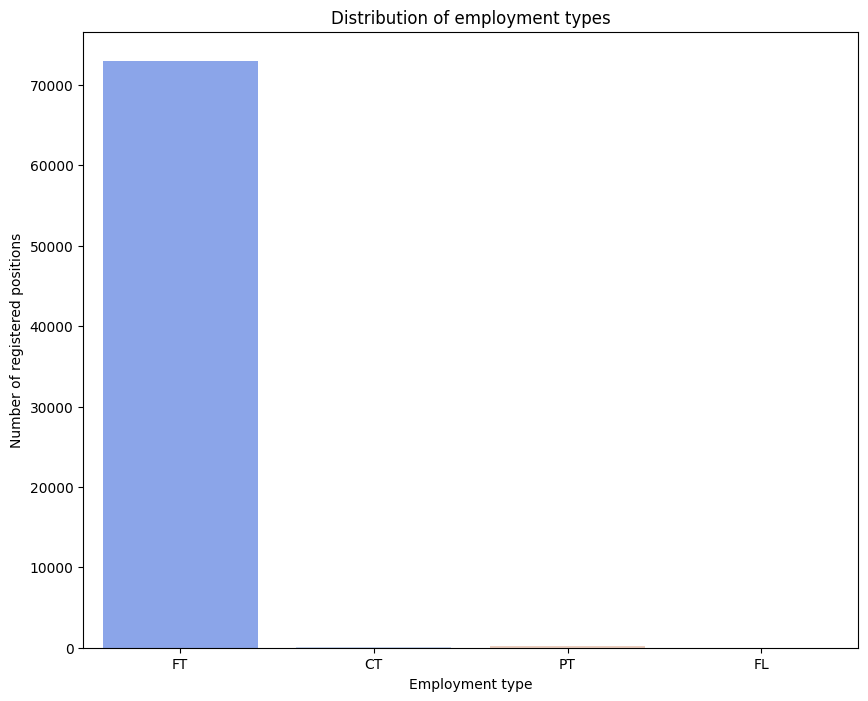

In [9]:
#Investigating the employment type distribution

plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='employment_type', palette='coolwarm')
# Add labels and title
plt.title('Distribution of employment types')
plt.ylabel('Number of registered positions')
plt.xlabel('Employment type')    



As the height of the bars are too different, the chart needs to be adjusted for visibility. This will be explored with a break in the scale or with a log scale.

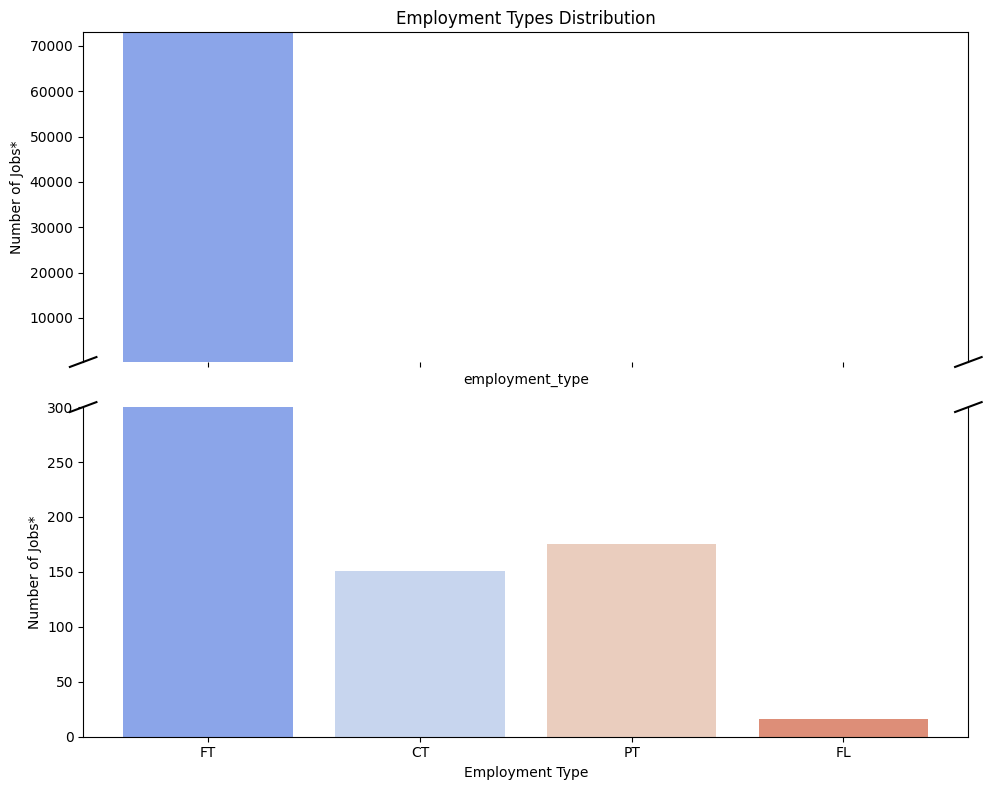

In [10]:
#Adding a breaking point to the graph for Employment types
# Create the figure and axes
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 8))

# Define the breaking point
break_point = 300  #  Based on data distribution

# Top plot for larger values
sns.countplot(data=df, x='employment_type', palette='coolwarm', ax=ax1)
ax1.set_ylim(break_point, df['employment_type'].value_counts().max())  # Focus on larger bars

# Bottom plot for smaller values
sns.countplot(data=df, x='employment_type', palette='coolwarm', ax=ax2)
ax2.set_ylim(0, break_point)  # Focus on smaller bars

# Hide the spines between the two plots
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Add the break marks
d = .015  # Break size
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top diagonal line
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top diagonal line on the right

kwargs.update(transform=ax2.transAxes)  
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal line
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom diagonal line on the right

# Titles and labels
ax1.set_title('Employment Types Distribution')
ax2.set_xlabel('Employment Type')
ax1.set_ylabel('Number of Jobs*')
ax2.set_ylabel('Number of Jobs*')

# Display the plot
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Employment type')

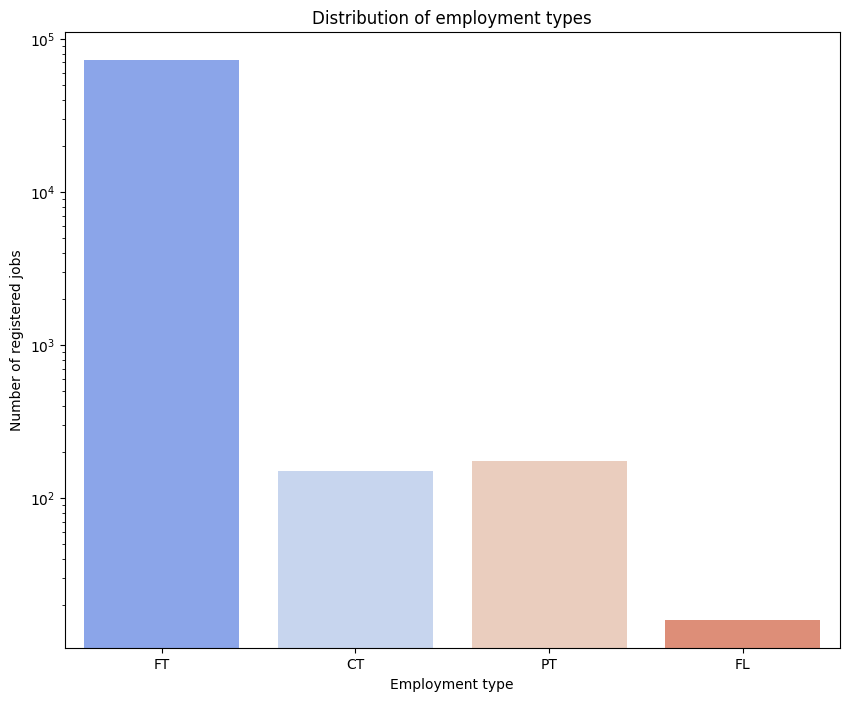

In [11]:
#Changing y axis to Log scale
plt.figure(figsize=(10, 8))
sns.countplot(data=df, x='employment_type', palette='coolwarm')
# Add labels and title
plt.yscale('log')
plt.title('Distribution of employment types')
plt.ylabel('Number of registered jobs')
plt.xlabel('Employment type')    

### Job titles

In [12]:
# Grouping by 'job_title' 
Job_positions = df.groupby('job_title').count()
Job_positions.shape


(289, 10)


There are 289 different job titles that will not fit in one graph, and we will only get a glimpse of the Top 10 positions.

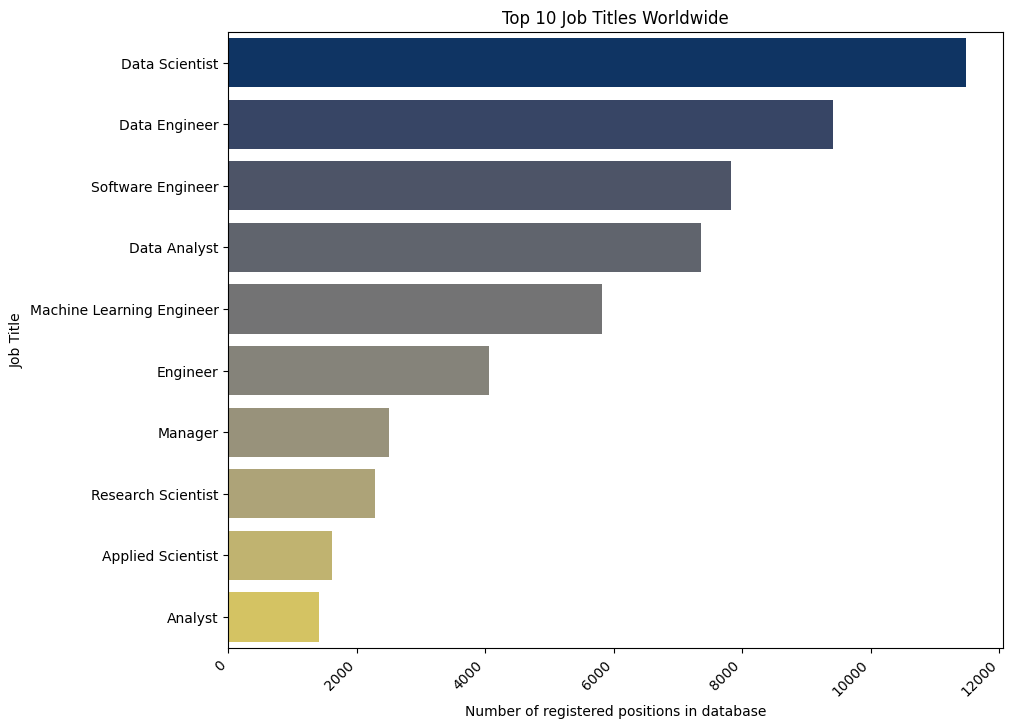

In [13]:
#Visualization of top 10 job positions
Top_10_positions = Job_positions.sort_values(by='work_year', ascending=False).head(10)

# Create the bar plot using sns.barplot
plt.figure(figsize=(10, 8))
sns.barplot(data=Top_10_positions, y=Top_10_positions.index, x='work_year',orient='h', palette='cividis')

# Add labels and title
plt.title('Top 10 Job Titles Worldwide')
plt.ylabel('Job Title')
plt.xlabel('Number of registered positions in database')

# Rotate the x-axis labels for better readability (if needed)
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/2065295838.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

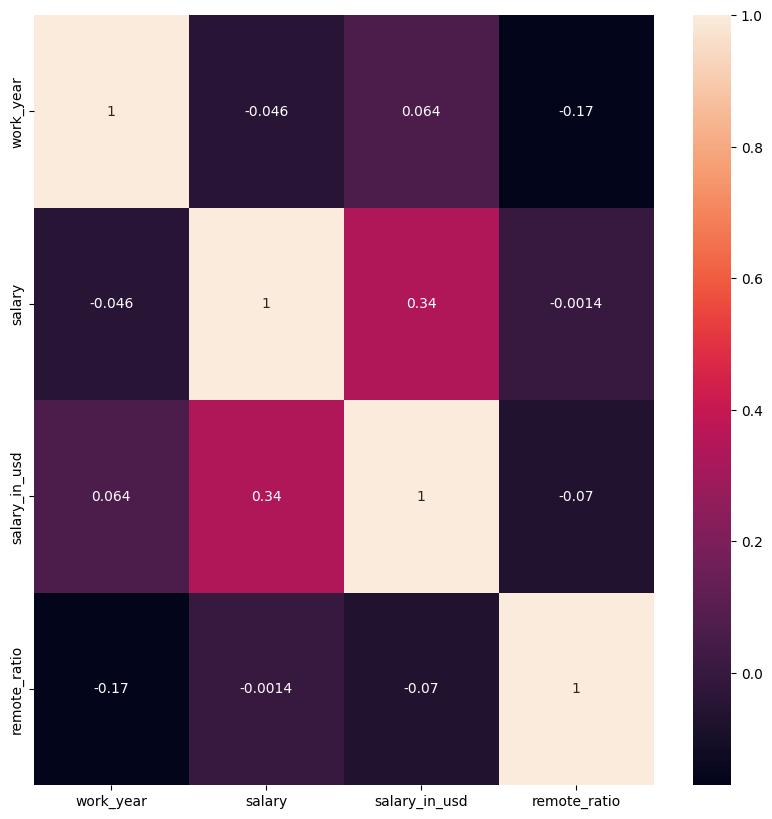

In [14]:
#Investigating correlation of numerical variables with heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot = True)


From the `Data Analyst perspective`, the following are jobs related to Analyst:

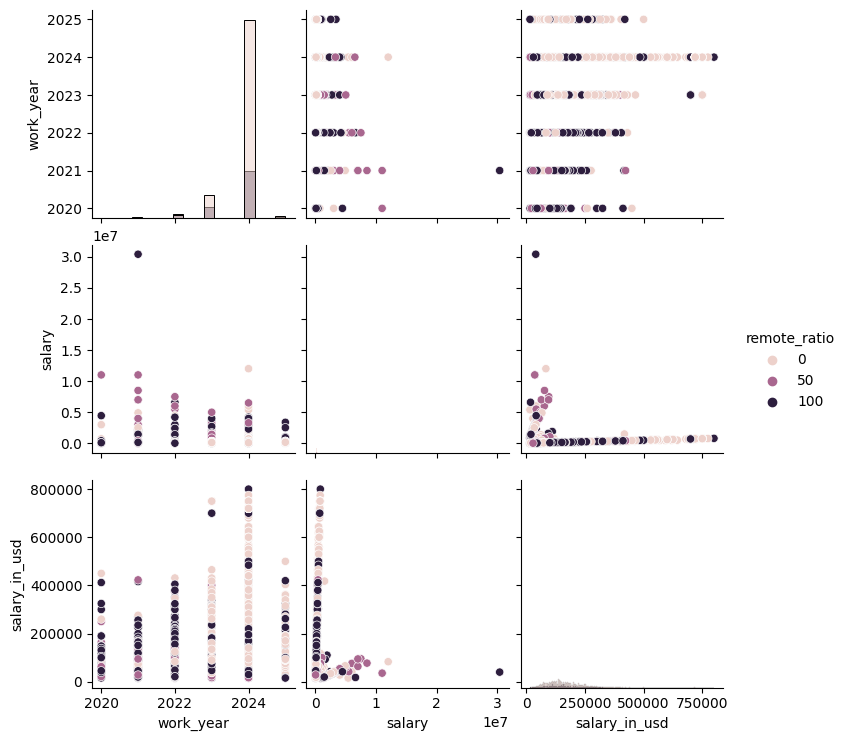

In [15]:
sns.pairplot(df, hue="remote_ratio", diag_kind="hist")

There aren't correlations  between the numerical variables in the  above graphs.

In [16]:
#Exploring the job positions suitable for Analysts         
df_analyst = df[df['job_title'].str.contains('Analy', case=False, na=False)]#str.constrains does not work well with query command
DA_group = df_analyst.groupby('job_title').count().sort_values(by='work_year', ascending=False)
DA_group.shape




(56, 10)

There are `56 job positions` related to Analysts, which could be attractive for a DA career shift. Their visualization goes as follows:

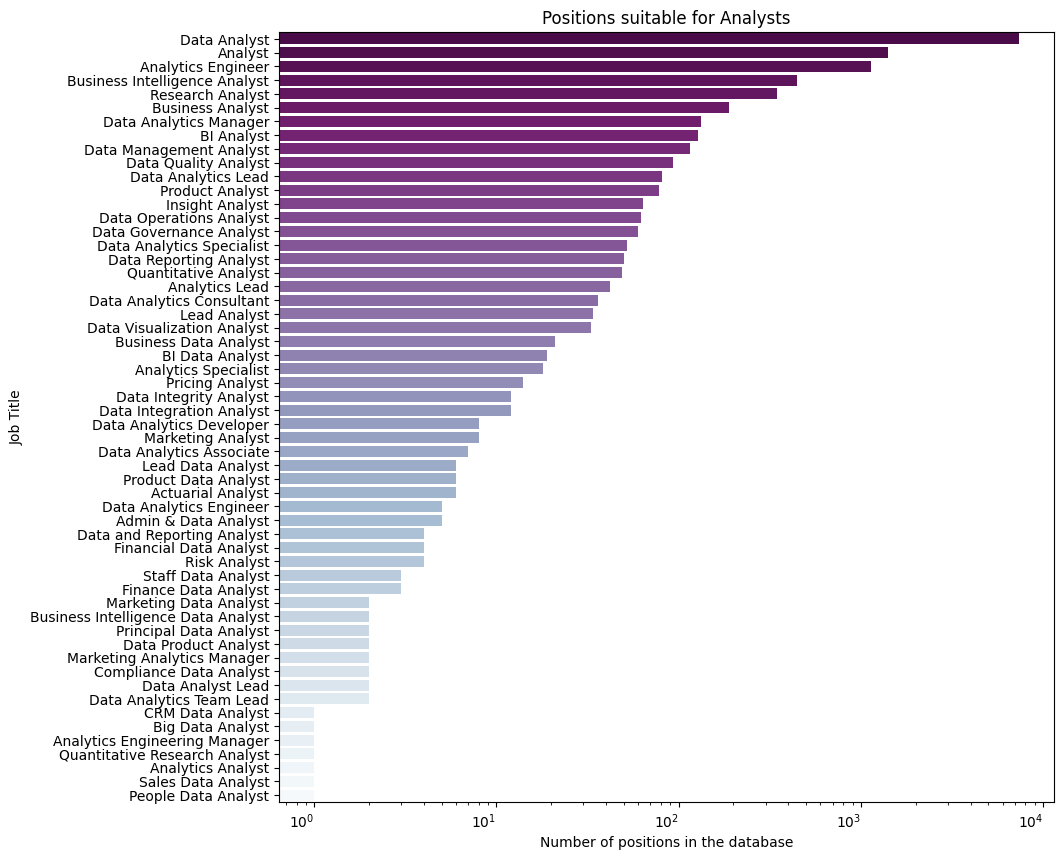

In [17]:
# Creating a bar plot using sns.barplot
plt.figure(figsize=(10, 10))
sns.barplot(data=DA_group, y=DA_group.index, x='work_year',orient='h', palette='BuPu_r')

# Add labels and title
plt.title('Positions suitable for Analysts')
plt.ylabel('Job Title')
plt.xlabel('Number of positions in the database')
plt.xscale('log')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=0, ha='right')

# Show the plot
plt.show()


### Employment type



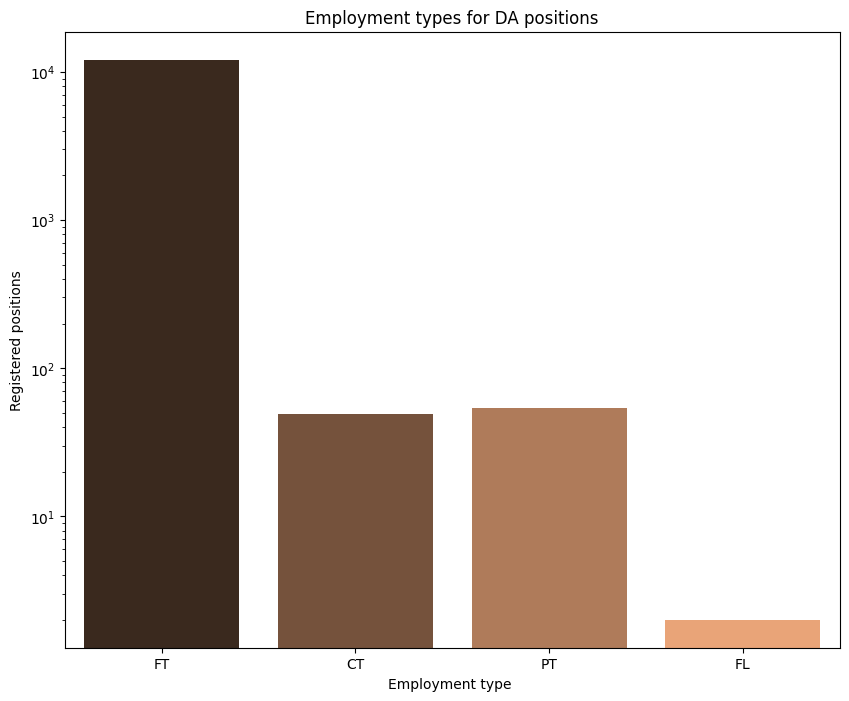

In [18]:
# Visualize distribution of Employment types for DA related job positions
plt.figure(figsize=(10, 8))
sns.countplot(data=df_analyst,x='employment_type',palette='copper')
# Add labels and title
plt.yscale('log')
plt.title('Employment types for DA positions')
plt.ylabel('Registered positions')
plt.xlabel('Employment type ')

#show the plot
plt.show()


In [19]:
#Calculating proportions of employment type for a better visibility in graph
DA_employment = df_analyst.groupby('employment_type')['job_title'].value_counts()
DA_employment2 = df_analyst['employment_type'].value_counts().reset_index()
# Rename columns for clarity
DA_employment2.columns = ['employment_type', 'count']
DA_employment2 = DA_employment2.sort_values(by='count', ascending=False)
# Calculate the percentages
DA_employment2['proportion (%)'] = round(DA_employment2['count'] / len(df_analyst) * 100, 1)

print(DA_employment2)

  employment_type  count  proportion (%)
0              FT  12092            99.1
1              PT     54             0.4
2              CT     49             0.4
3              FL      2             0.0


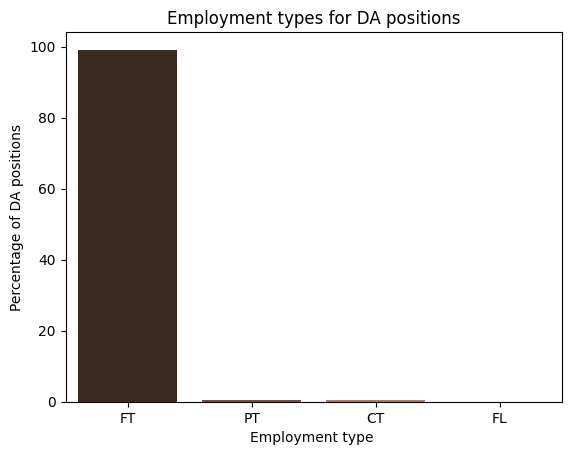

In [20]:
#Plot the % of employment type of the DA related job positions
sns.barplot(data=DA_employment2,x='employment_type',y='proportion (%)', palette='copper')

# Add labels and title
plt.title('Employment types for DA positions')
plt.ylabel('Percentage of DA positions')
plt.xlabel('Employment type ')

plt.show()


<Figure size 800x800 with 0 Axes>

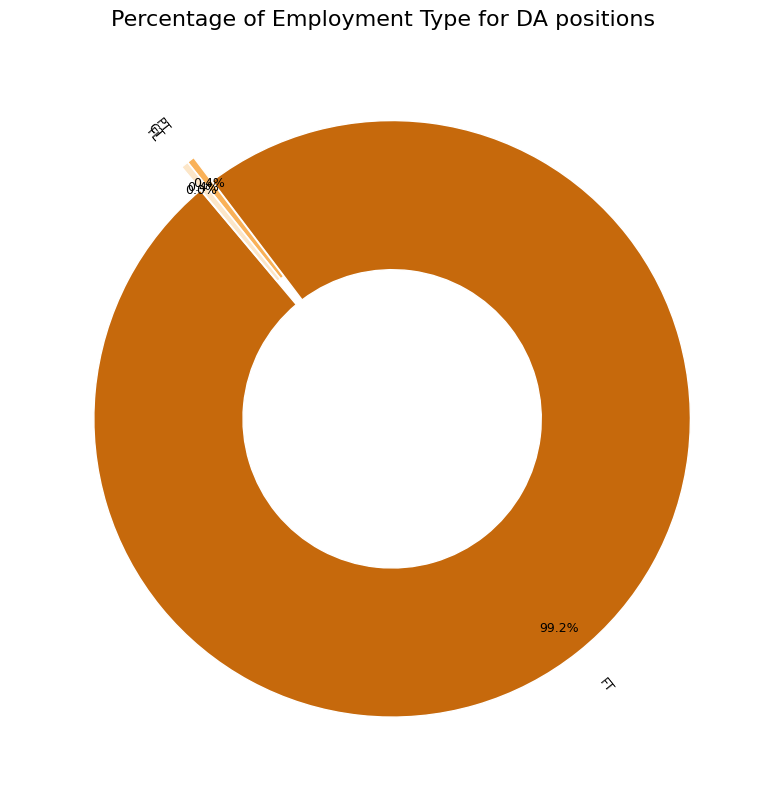

In [21]:
# Donut chart with customizations
plt.figure(figsize=(8, 8))
colors = sns.color_palette('PuOr')  
explode = (0.05, 0.05, 0.05,0.05)  # Slightly pull out each slice for emphasis

# Donut Chart 
plt.figure(figsize=(8, 8))

# Pie chart 
wedges, texts, autotexts = plt.pie(
    DA_employment2['proportion (%)'], 
    labels=DA_employment2['employment_type'], 
    autopct='%1.1f%%', 
    colors=colors, 
    explode=explode, 
    shadow=False,
    wedgeprops=dict(width=0.5, edgecolor='w'),
    pctdistance= 0.90,
    labeldistance=1.1,
    rotatelabels= True,
    textprops={'fontsize': 10},
    startangle=130,

)

# Circle definition in the center for the donut effect
centre_circle = plt.Circle((0,0), 0.4, fc='white')
plt.gca().add_artist(centre_circle)

# Beautify text
for text in texts + autotexts:
    text.set_fontsize(9)

plt.title('Percentage of Employment Type for DA positions', fontsize=16)
plt.tight_layout()
plt.show()

Full Time (FT) employment type is the dominant for the position related to Analysts. What positions exactly are included in under Full Time employment type?

                             job_title  count
0                         Data Analyst   7289
1                              Analyst   1407
2                   Analytics Engineer   1138
3        Business Intelligence Analyst    445
4                     Research Analyst    343
5                     Business Analyst    187
6               Data Analytics Manager    132
7                           BI Analyst    125
8              Data Management Analyst    116
9                 Data Quality Analyst     93
10                 Data Analytics Lead     81
11                     Product Analyst     78
12                     Insight Analyst     64
13             Data Operations Analyst     62
14             Data Governance Analyst     60
15           Data Analytics Specialist     52
16              Data Reporting Analyst     50
17                Quantitative Analyst     49
18                      Analytics Lead     42
19           Data Analytics Consultant     35
20                        Lead Ana

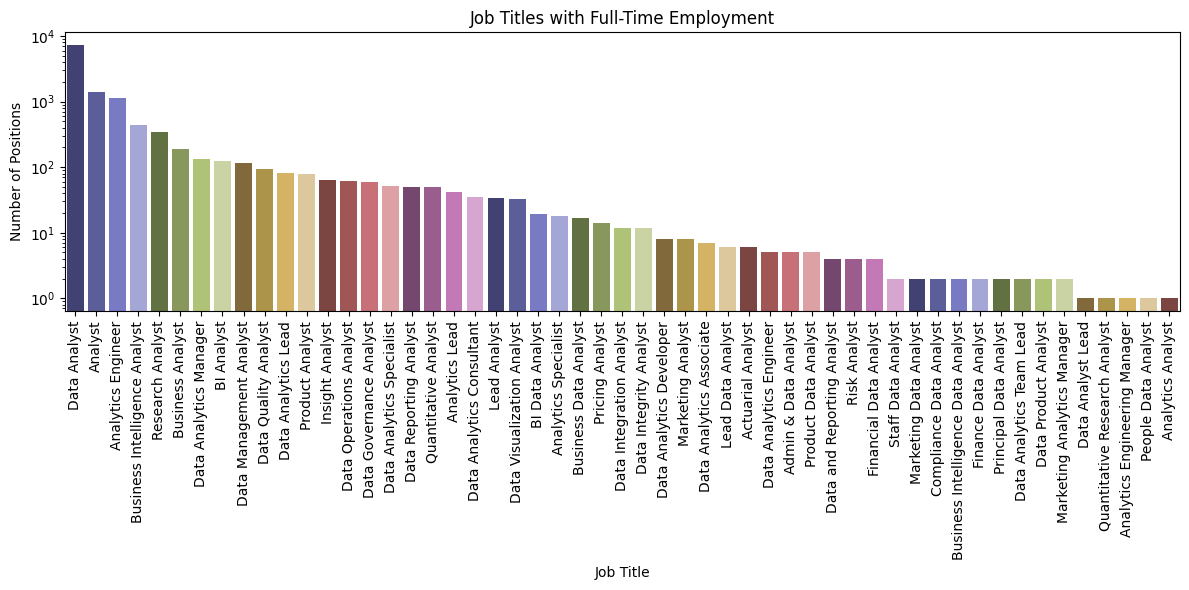

In [22]:
#Filter FT employment type
full_time_jobs = df_analyst[df_analyst['employment_type'] == 'FT']

# Count job titles for Full-Time employment
FT_job_title = full_time_jobs['job_title'].value_counts().reset_index()
FT_job_title.columns = ['job_title', 'count']

print(FT_job_title)

# Plot bar chart with the distribution
plt.figure(figsize=(12, 6))
sns.barplot(data=FT_job_title, x='job_title', y='count', palette='tab20b')
plt.title('Job Titles with Full-Time Employment')
plt.xlabel('Job Title')
plt.ylabel('Number of Positions')
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability
plt.tight_layout()
plt.show()


The Full time employment type is the most abundant, just like for all the data professions.

### Experience level

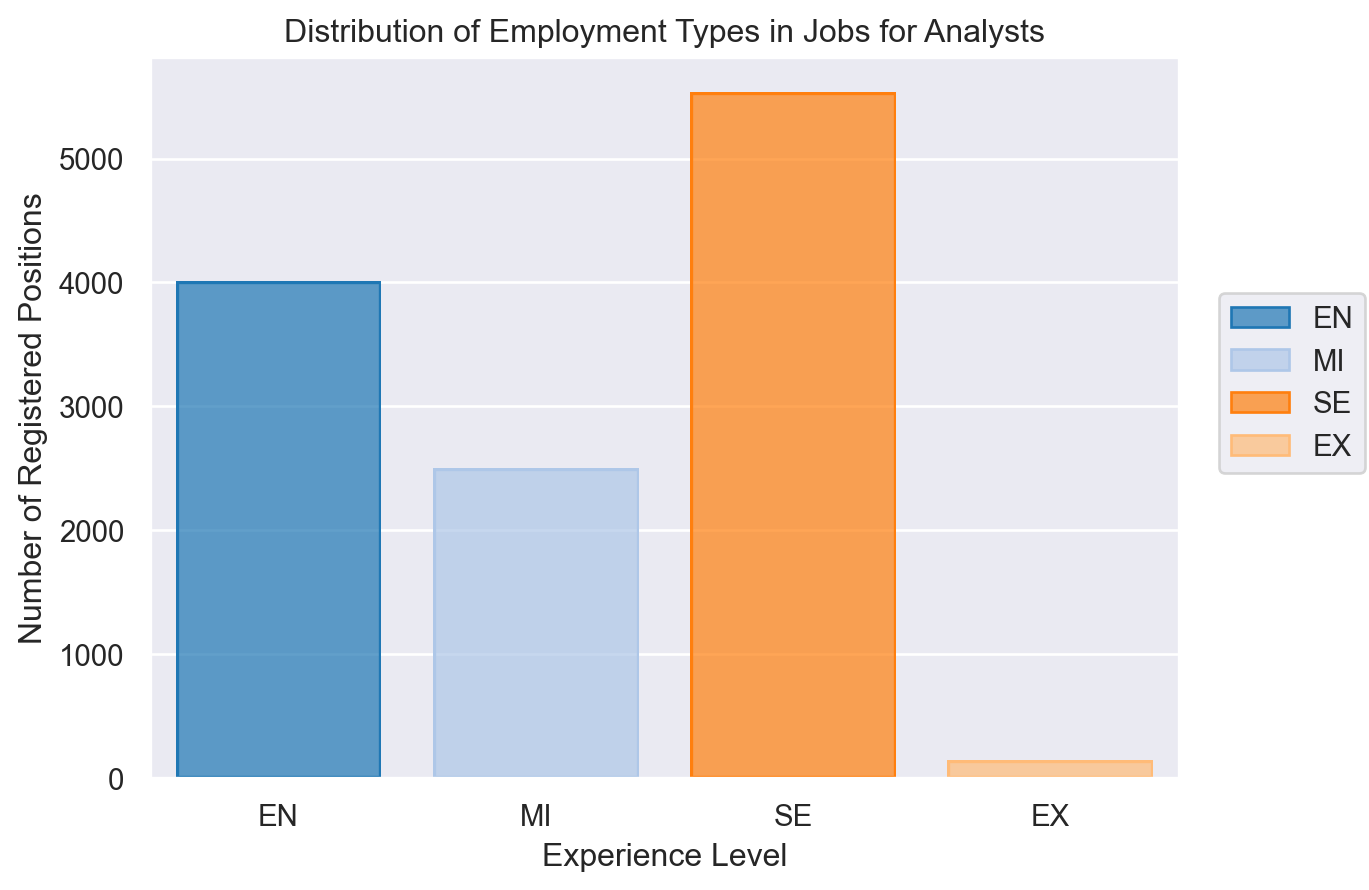

In [23]:
#Exploring the distribution of experience level for jobs for analysts
so.Plot(df_analyst, x="experience_level", color="experience_level").add(
    so.Bar(), so.Hist()
).scale(
    color="tab20" 
).label(
    x="Experience Level",
    y="Number of Registered Positions",
    title="Distribution of Employment Types in Jobs for Analysts",
    legend=" ", color=""
)

SE is the most abundant followed by the EN, which could be appealing for individuals assessing a shift to Analyst profile, but which job titles are associated to these experience levels?

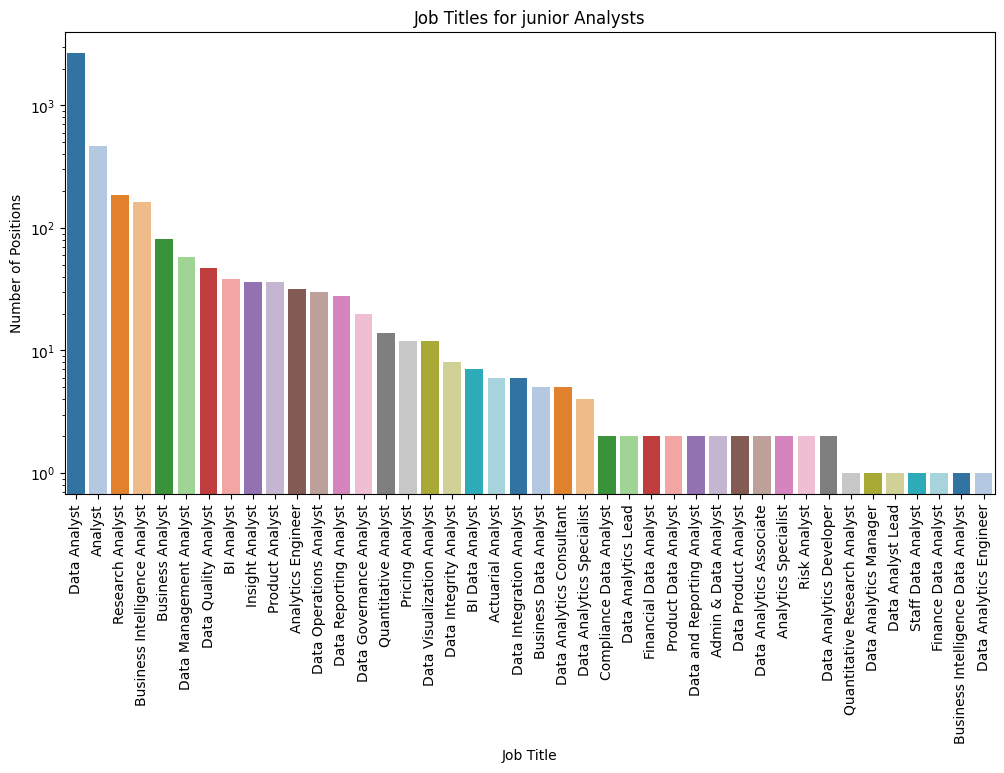

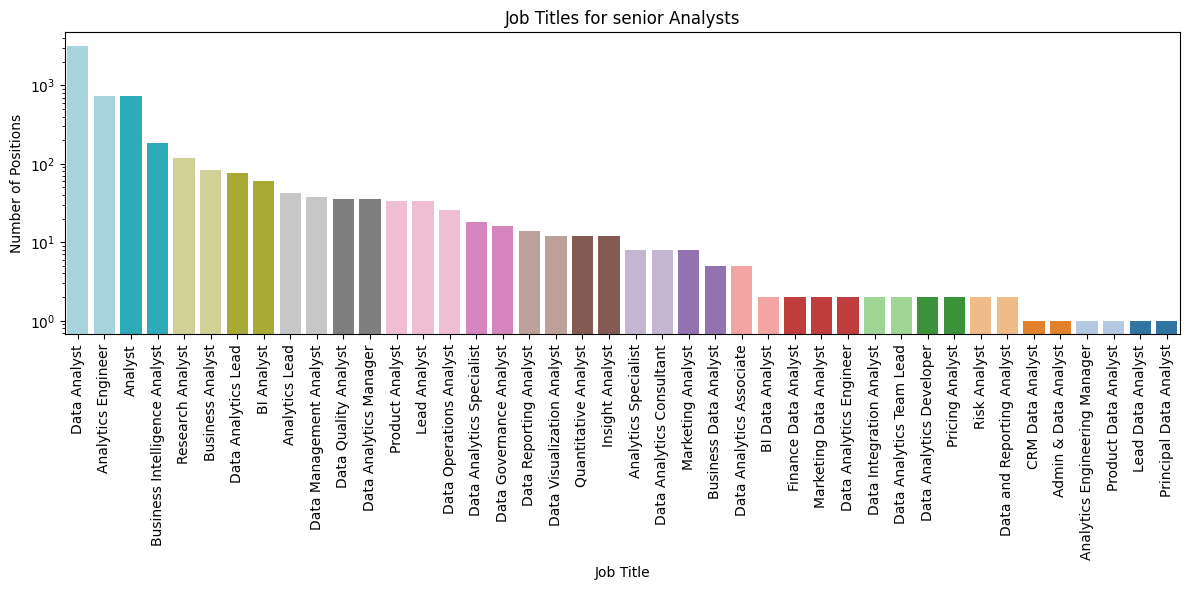

In [24]:
#Filter EN and SE employment type
EN_jobs = df_analyst[df_analyst['experience_level'] == 'EN']
SE_jobs = df_analyst[df_analyst['experience_level'] == 'SE']

# Count job titles for EN and SE employment
EN_job_title = EN_jobs['job_title'].value_counts().reset_index()
EN_job_title.columns = ['job_title', 'count']

SE_job_title = SE_jobs['job_title'].value_counts().reset_index()
SE_job_title.columns = ['job_title', 'count']

# Plot bar chart with the distribution
# Junior positions (EN)
plt.figure(figsize=(12, 6))
sns.barplot(data=EN_job_title, x='job_title', y='count', palette='tab20')
plt.title('Job Titles for junior Analysts')
plt.xlabel('Job Title')
plt.ylabel('Number of Positions')
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability

# Senior positions (SE)
plt.figure(figsize=(12, 6))
sns.barplot(data=SE_job_title, x='job_title', y='count', palette='tab20_r')
plt.title('Job Titles for senior Analysts')
plt.xlabel('Job Title')
plt.ylabel('Number of Positions')
plt.yscale('log')
plt.xticks(rotation=90)  # Rotate for better readability

plt.tight_layout()
plt.show()

DA is a job that shows similar opportunities for Seniors and Juniors. The job titles are similar for both levels of experience.

### Salary distribution


In [25]:
#Overview of salaries in USD for Analysts related job position
pd.set_option('display.float_format',lambda x: '%.0f' % x)
DA_salary = df_analyst.sort_values(by='salary_in_usd',ascending=False).groupby('job_title')['job_title','salary_in_usd']
DA_salary.head()


/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/468786297.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  DA_salary = df_analyst.sort_values(by='salary_in_usd',ascending=False).groupby('job_title')['job_title','salary_in_usd']


,job_title,salary_in_usd
60419,Data Analyst,774000
61805,Data Analyst,750000
61218,Analytics Engineer,750000
60902,Analytics Engineer,720000
562,Analytics Engineer,720000
...,...,...
73041,Data Analytics Engineer,20000
73023,Product Data Analyst,20000
73286,Lead Data Analyst,19609
63642,Data Analyst Lead,18000


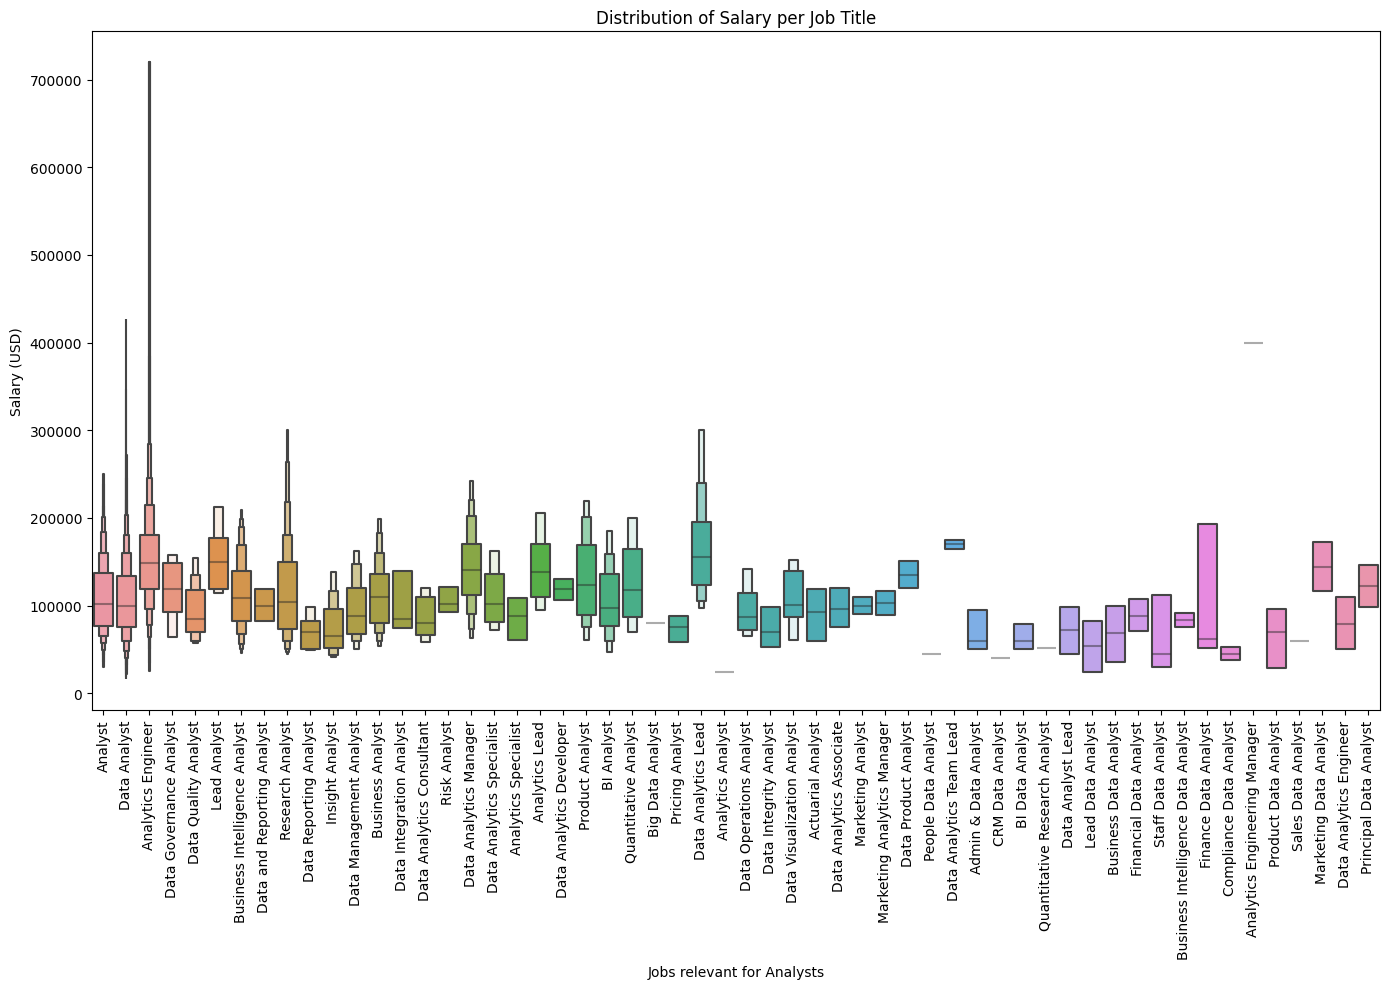

In [26]:
#Plotting distribution of salary in usd for jobs suitable to analysts
plt.figure(figsize=(14, 10))
sns.boxenplot(data=df_analyst, x="job_title",y='salary_in_usd',showfliers=False)
# Customize the plot
plt.title('Distribution of Salary per Job Title')
plt.xlabel('Jobs relevant for Analysts')
plt.ylabel('Salary (USD)')
plt.xticks(rotation=90)  # Rotate job titles for better readability
plt.tight_layout()
plt.show()

It seems that several jobs suitable for analysts have a salary below the 200K USD.

What about the salary of the top 10 jobs for analysts?

In [27]:
T10_DA= df_analyst['job_title'].value_counts().head(10)

print(T10_DA)

Data Analyst                     7362
Analyst                          1417
Analytics Engineer               1138
Business Intelligence Analyst     449
Research Analyst                  345
Business Analyst                  189
Data Analytics Manager            132
BI Analyst                        127
Data Management Analyst           116
Data Quality Analyst               93
Name: job_title, dtype: int64


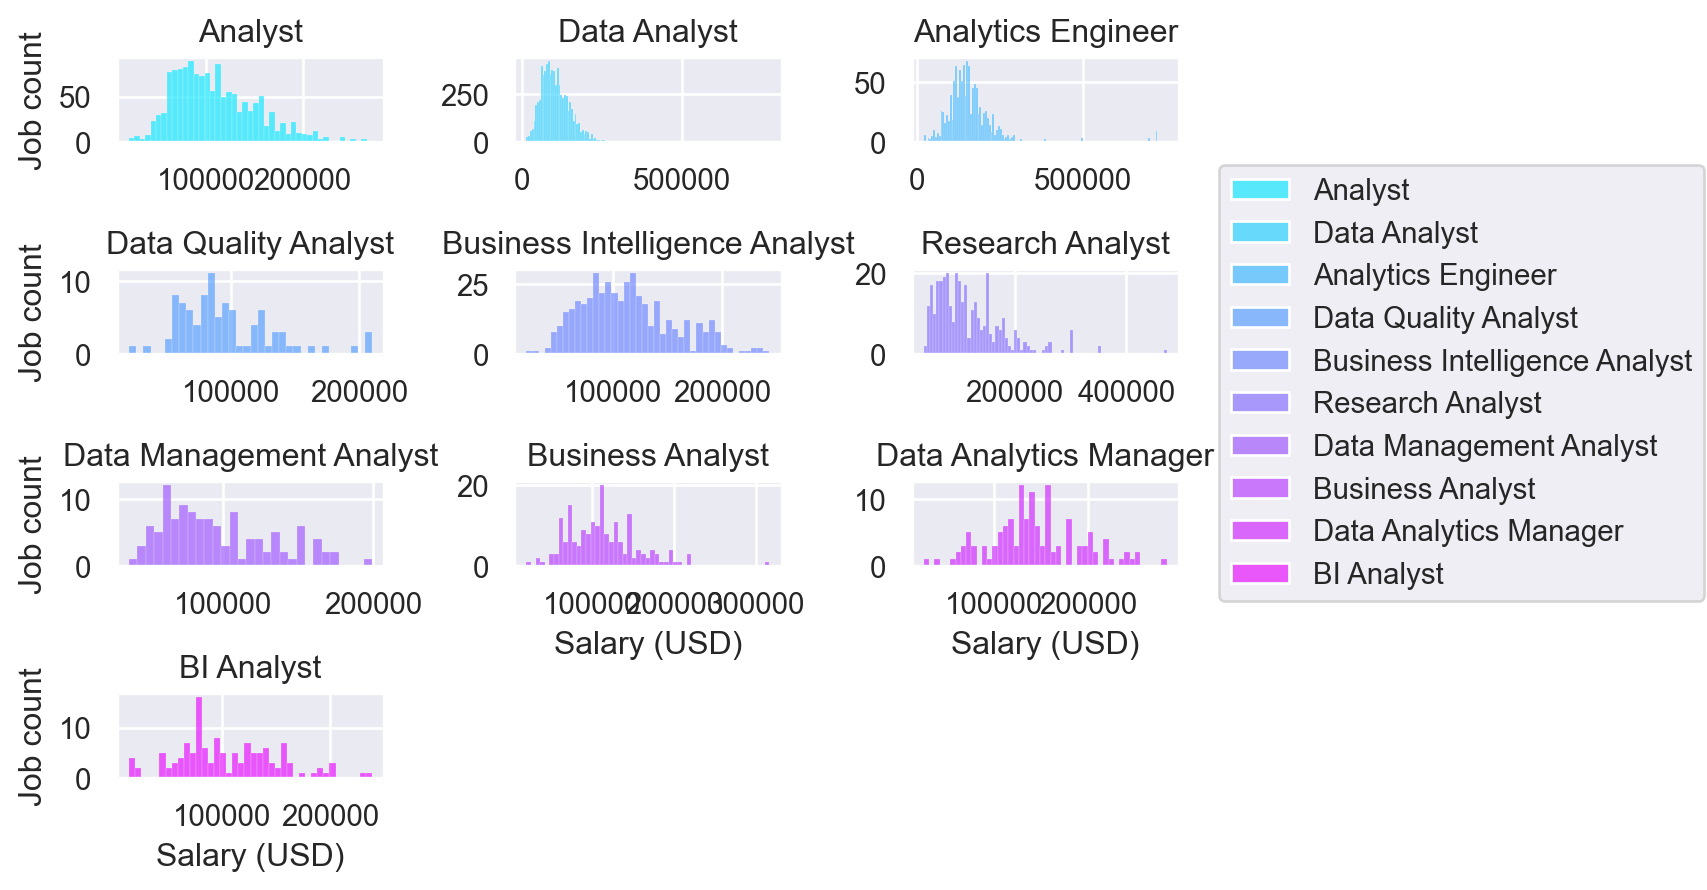

<Figure size 1400x2000 with 0 Axes>

In [28]:
#Visualizing distribution of salaries for Top 10 jobs suited to Analysts
Top10_JobTitleA=['Data Analyst', 'Analyst','Analytics Engineer', 'Business Intelligence Analyst', 'Research Analyst', 'Business Analyst', 'Data Analytics Manager', 'BI Analyst', 'Data Management Analyst', 'Data Quality Analyst']
Top_10_AJobs= df_analyst[df_analyst['job_title'].isin(Top10_JobTitleA)]

#Subplots of salaries in USD
plt.figure(figsize=(14, 20))
(
    so.Plot(Top_10_AJobs, x="salary_in_usd")
    .facet(col="job_title", wrap=3)
    .add(so.Bars(), so.Hist(), color="job_title")
    .share(x=False,y=False)
    .scale(color="cool")
    .label(
        y="Job count", x="Salary (USD)",
        color= "", legend=None
    )
)

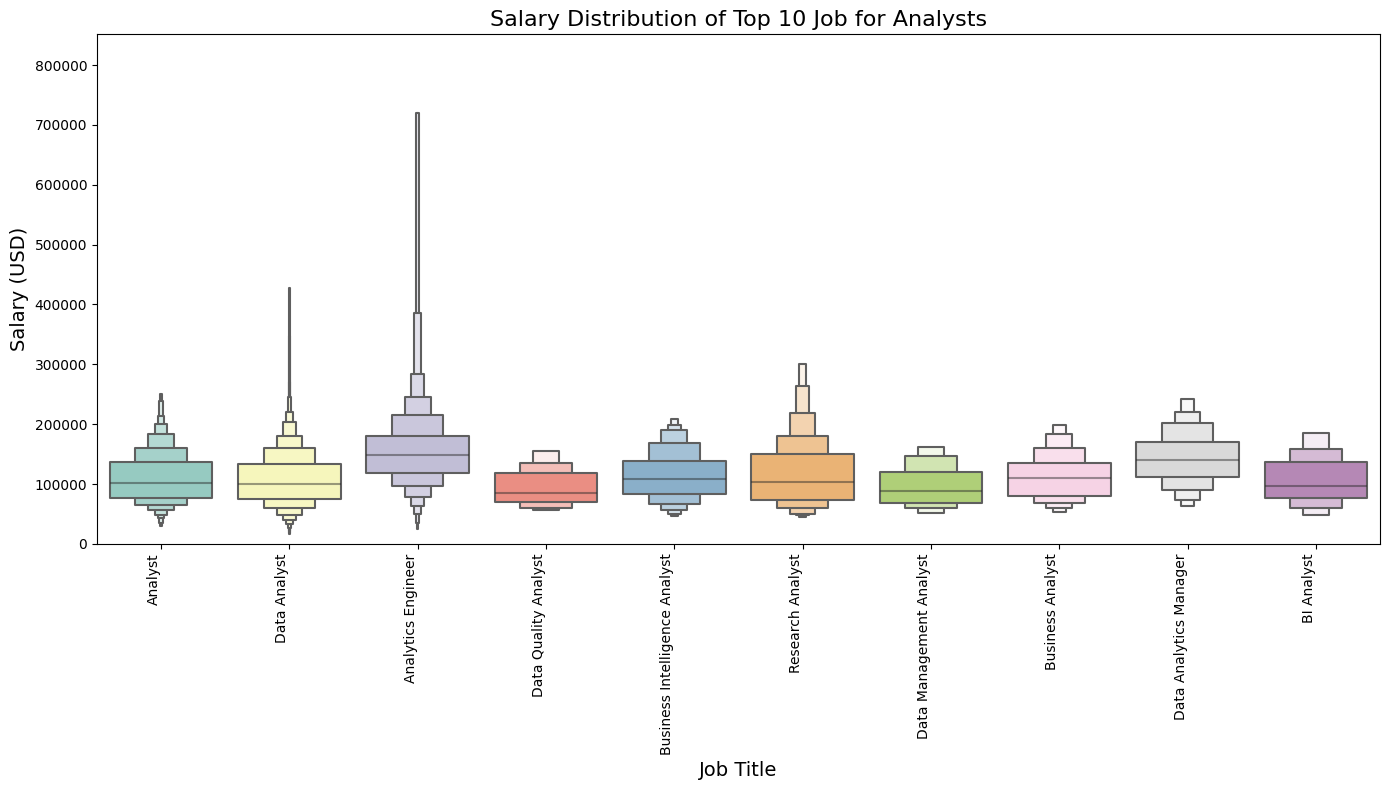

In [29]:
#Option 2 for salary visualization in top 10 jobs for analysts

# Boxen plot for salary distribution with improved visibility
plt.figure(figsize=(14, 8))
sns.boxenplot(data=Top_10_AJobs, x="job_title", y="salary_in_usd", palette="Set3",showfliers=False)

# Customization for better visibility
plt.title('Salary Distribution of Top 10 Job for Analysts', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.xticks(rotation=90, ha='right')  # Rotate labels for readability
plt.ylim(0, Top_10_AJobs['salary_in_usd'].max() * 1.1)  # Adjust y-axis for clarity
plt.tight_layout()
plt.show()

In [30]:
Top_10_AJobs.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,11368,11368,11368,11368
mean,2024,116748,113310,26
std,1,120979,53793,44
min,2020,14400,15000,0
25%,2024,76875,77000,0
50%,2024,105000,105000,0
75%,2024,140000,140000,100
max,2025,6000000,774000,100


The mean salary (USD) for the top 10 jobs for analysts lies around 113K USD (worldwide wise).

### Remote ratio

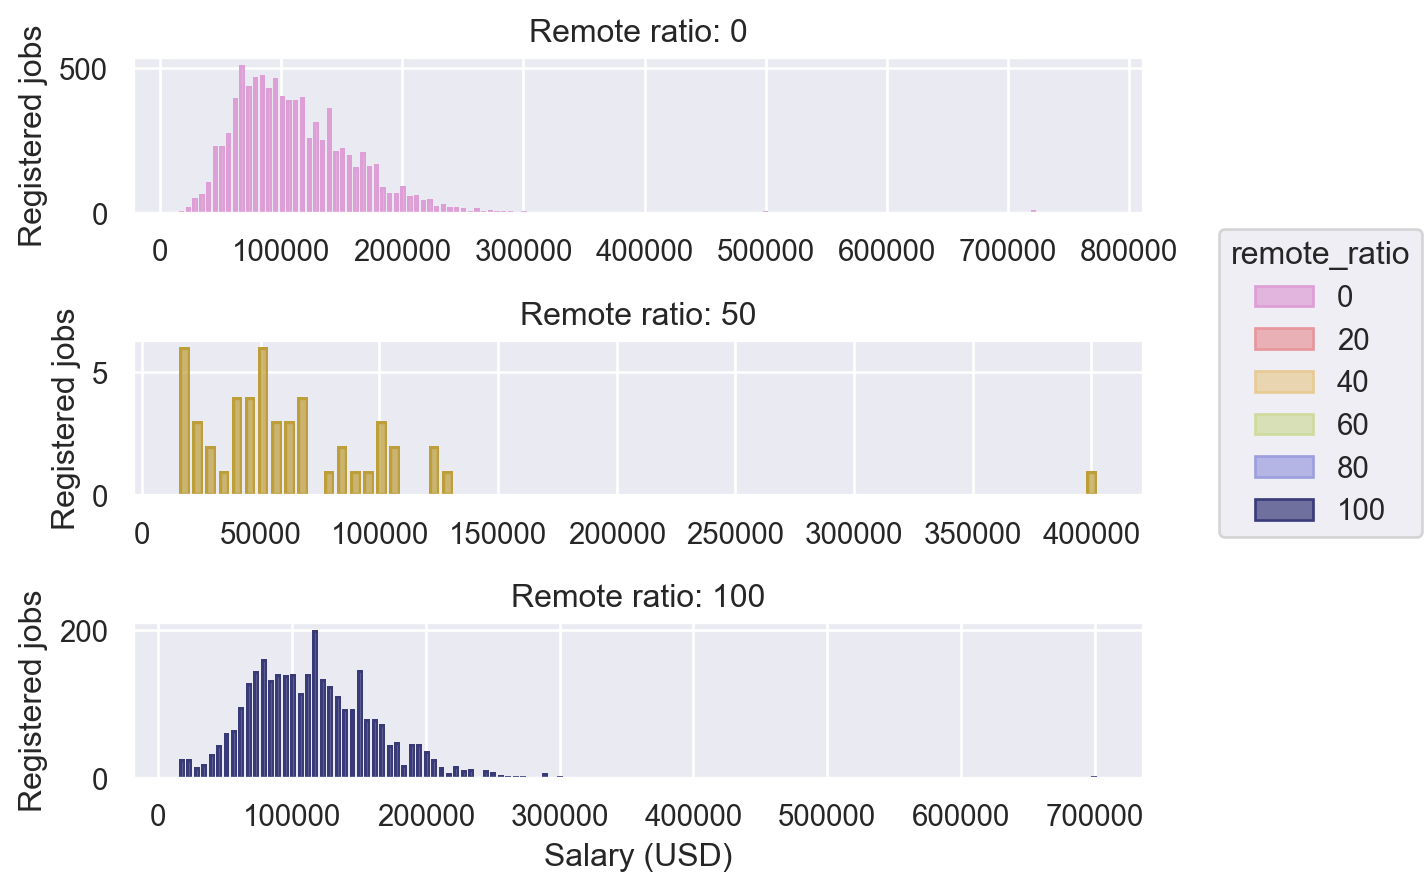

<Figure size 1000x800 with 0 Axes>

In [31]:
#Visualizing distribution of Remote ratio for jobs suited to Analysts

plt.figure(figsize=(10, 8))
(
    so.Plot(df_analyst, x="salary_in_usd",color="remote_ratio")
    .facet("remote_ratio",wrap=1)
    .add(so.Bar(), so.Hist())
    .share(x=False,y=False)
    .scale(color="tab20b_r")
    .label(
        x="Salary (USD)", y="Registered jobs",
        col="Remote ratio:"
    )
)


Work on site and remote are available for Analysts. What positions are related to Remote or hybrid work?

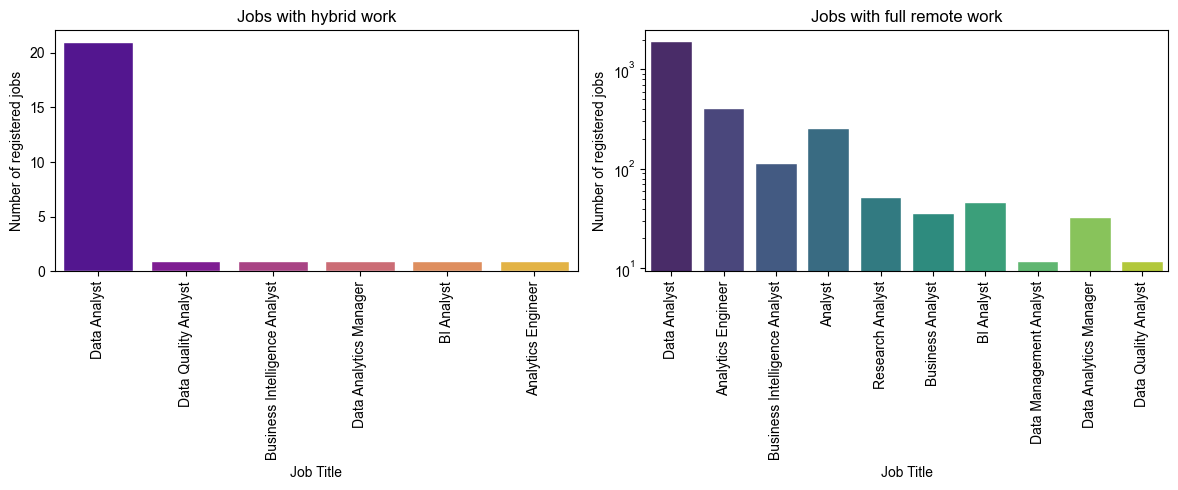

In [32]:
#Filter fully remote (remote ratio=100) and hybrid (remote ratio=50)
Remote_jobs = Top_10_AJobs[Top_10_AJobs['remote_ratio'] == 100]
Hybrid_jobs = Top_10_AJobs[Top_10_AJobs['remote_ratio'] == 50]

# Plot bar charts with the distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.set_style('darkgrid')

#Plot for hybrid jobs
sns.countplot(Hybrid_jobs,x="job_title",ax=ax1,palette='plasma')
ax1.set_title('Jobs with hybrid work')
ax1.set_xlabel('Job Title')
ax1.set_ylabel('Number of registered jobs')
ax1.tick_params(axis='x', labelrotation=90)
plt.yscale('log')

#Plot for remote jobs
sns.countplot(Remote_jobs,x="job_title", ax=ax2,palette='viridis')
ax2.set_title('Jobs with full remote work')
ax2.set_xlabel('Job Title')
ax2.set_ylabel('Number of registered jobs')
ax2.tick_params(axis='x', labelrotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show()


Hybrid work is reported mainly for DA. Is it possible to see the change in remote ratio over time for the Top 10 jobs for Analysts?

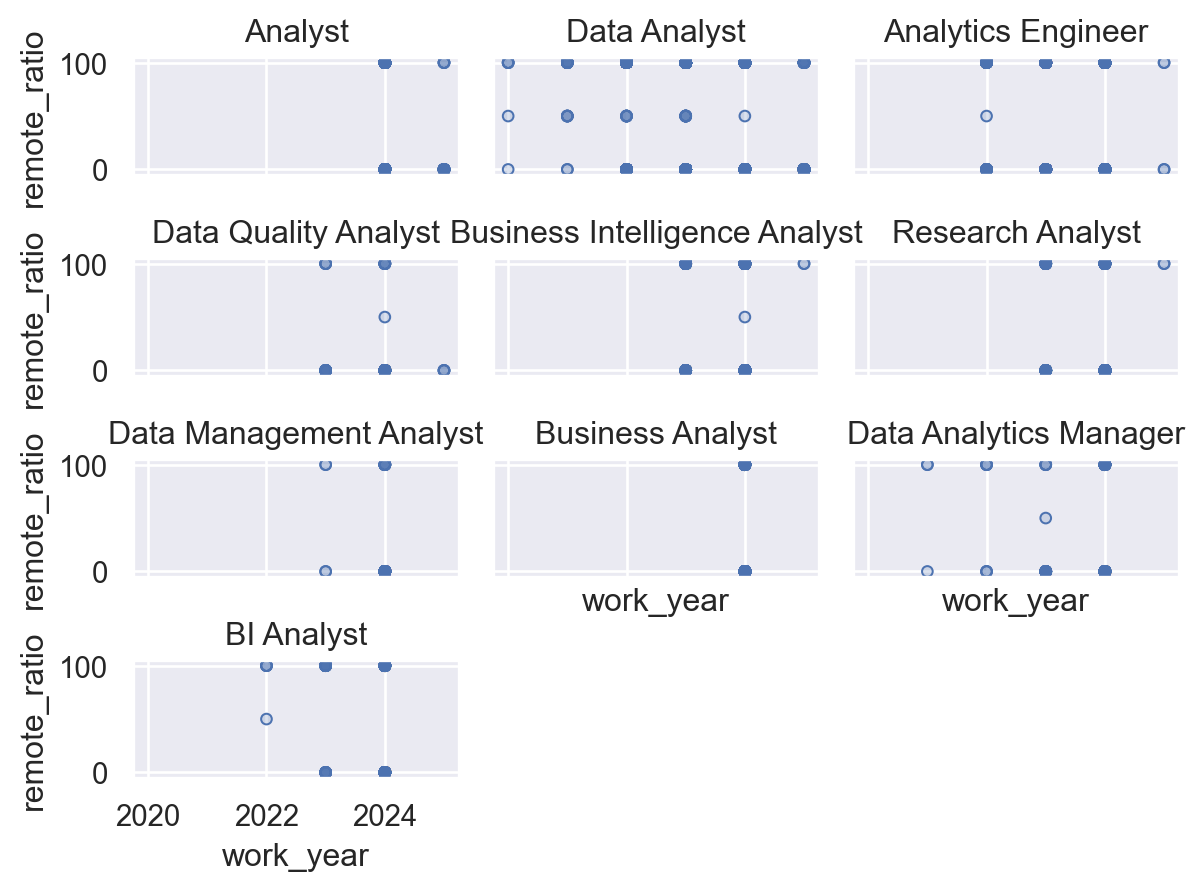

In [33]:
#Option 1 to see the evolution of remote jobs for analysts in subplots
(
    so.Plot(Top_10_AJobs, x="work_year", y="remote_ratio")
    .facet(col="job_title", wrap=3)
    .add(so.Dots())
)

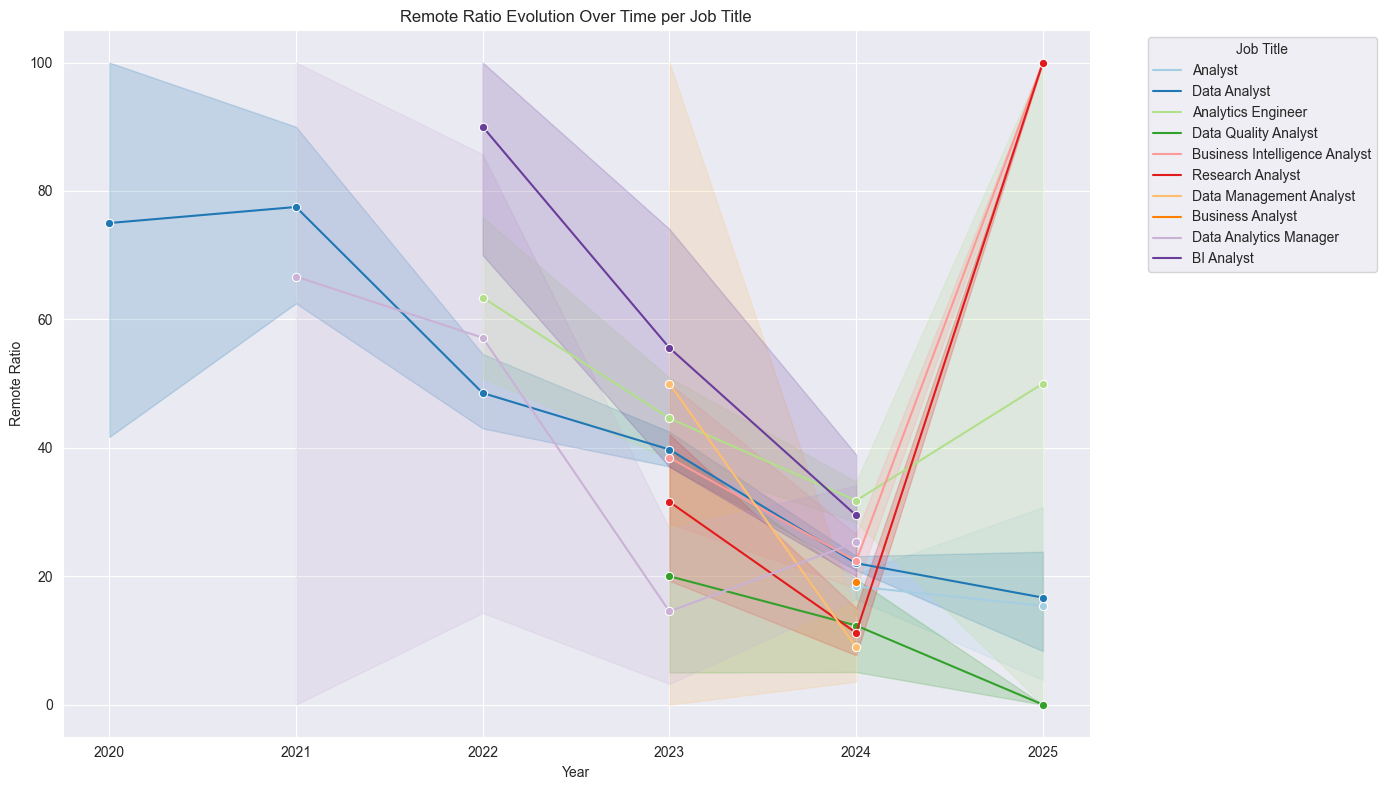

In [34]:
#Option 2 in a time series

plt.figure(figsize=(14, 8))
sns.lineplot(data=Top_10_AJobs, x="work_year", y="remote_ratio", hue="job_title", marker="o",estimator="mean",errorbar=('ci',95),palette="Paired")
plt.title('Remote Ratio Evolution Over Time per Job Title')
plt.xlabel('Year')
plt.ylabel('Remote Ratio')
plt.legend(title="Job Title", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Exploring `correlations` in the filtered data frame for Analyst positions

As there was no visible correlation between the numerical values from the general screening, some categorical data will be transformed.

                          work_year  salary  salary_in_usd  remote_ratio  \
work_year                         1      -0              0            -0   
salary                           -0       1              0             0   
salary_in_usd                     0       0              1             0   
remote_ratio                     -0       0              0             1   
experience_level_encoded         -0       0              0             0   

                          experience_level_encoded  
work_year                                       -0  
salary                                           0  
salary_in_usd                                    0  
remote_ratio                                     0  
experience_level_encoded                         1  


/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/1642350515.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analyst['experience_level_encoded'] = df_analyst['experience_level'].astype('category').cat.set_categories(exp_order).cat.codes
/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/1642350515.py:16: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_analyst.corr()


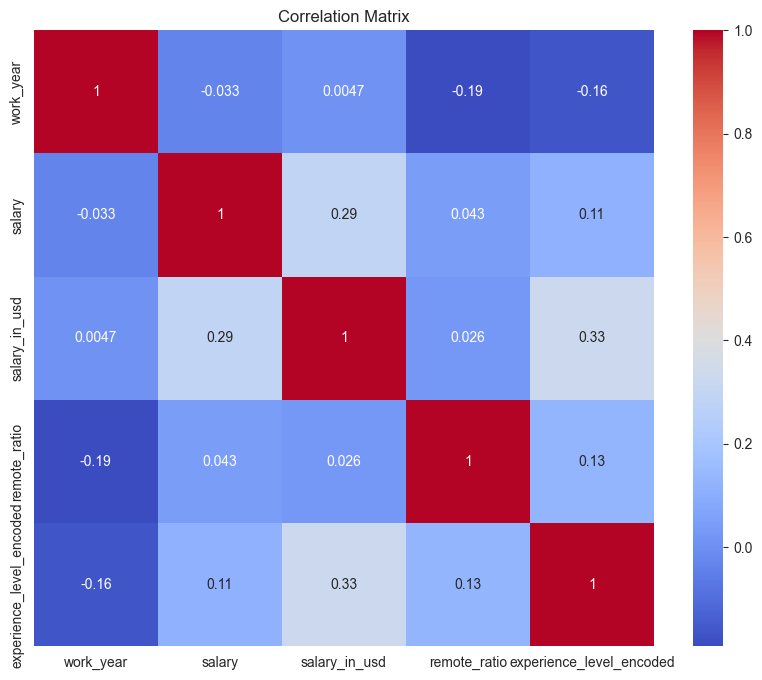

In [35]:
#Transformation of categorical data
from sklearn.preprocessing import LabelEncoder

# Label encode experience level (assuming order: Entry < Mid < Senior < Executive)
exp_order = ['EN', 'MI', 'SE', 'EX']
size_order = ['S','M','L']

# Assign numeric codes based on order
df_analyst['experience_level_encoded'] = df_analyst['experience_level'].astype('category').cat.set_categories(exp_order).cat.codes
encoder = LabelEncoder()
encoded_data = encoder.fit_transform(['EN', 'MI', 'Senior-level'])
# Nominal data with One-hot encode employment type
df_analyst2= pd.get_dummies(df_analyst, columns=['employment_type','employee_residence','company_location'], drop_first=True)
df_analyst2.dtypes

# Check correlation matrix
correlation_matrix = df_analyst.corr()
print(correlation_matrix)

# Visualize with a heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

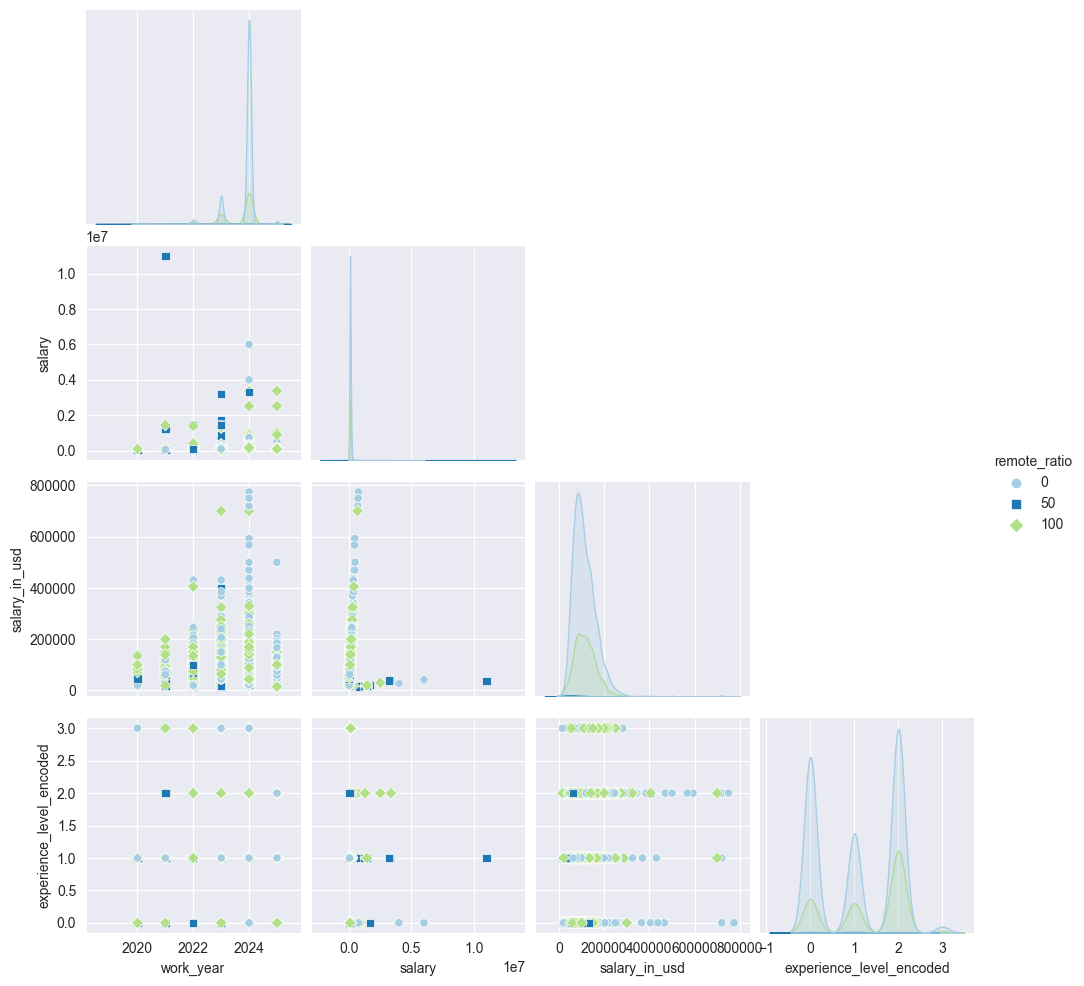

In [36]:
sns.pairplot(df_analyst, hue="remote_ratio", diag_kind="kde", markers=["o", "s", "D"], corner= True,palette="Paired")

In [37]:
##Investigating correlation of numerical variables with correlation plot
plt.figure(figsize=(10, 10))
matrix = np.triu(df.corr())
sns.heatmap(df_analyst2.corr(), annot=True,
             linewidth=.8, mask=matrix, cmap="twilight");

/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/466108678.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(df.corr())
/var/folders/n_/5b441hbn2gs4bcnppdhs1qdc0000gn/T/ipykernel_10530/466108678.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_analyst2.corr(), annot=True,


ValueError: Mask must have the same shape as data.

<Figure size 1000x1000 with 0 Axes>

## Exploring data to answer hypotheses


### Refine analyzed years to 2022-2024


In [55]:
#df_year_filtered = df.query('work_year > 2021 and work_year < 2025')

### Top 10 positions for DA

In [ ]:
# Drop salary currency column

### H1. There are not many hybrid nor remote opportunities for DA based on data from 2022-2024.
 

In [ ]:
jointplot remote ratio vs work year?

### H2. DA with entry level are on demand.


In [ ]:
#Experience level vs job title hue per year
(
    so.Plot(penguins, x="species", y="body_mass_g", color="sex")
    .add(so.Bar(), so.Agg(), so.Dodge(), orient= "x")
)

 ### H3. It is more profitable to relocate out of Germany.

In [ ]:
# Salary of DA Europe, worldwide, Germany?